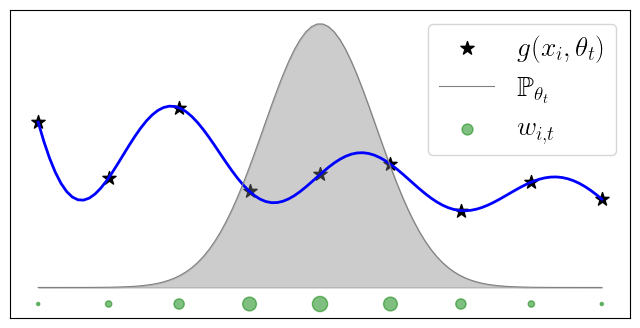

<Figure size 640x480 with 0 Axes>

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.kernel_ridge import KernelRidge

plt.rc('text', usetex=True)
plt.rc('text.latex', preamble=r'\usepackage{amsmath, amsfonts}')


# Generate sample data
def fancy_positive_function(X):
    return (np.exp(-0.3 * X) * (np.sin(2 * np.pi * X) + 1.5) + 1) / 5


np.random.seed(0)
X_train = np.linspace(0, 5, 9).reshape(-1, 1)
y_train = fancy_positive_function(X_train).ravel()

# Generate test data
X_test = np.linspace(0, 5, 100).reshape(-1, 1)

# Define RBF kernel function
def rbf_kernel(X1, X2, gamma=0.5):
    pairwise_sq_dists = np.sum(X1**2, axis=1).reshape(-1, 1) + np.sum(X2**2, axis=1) - 2 * np.dot(X1, X2.T)
    return np.exp(-gamma * pairwise_sq_dists)

# Set regularization parameter and kernel parameter
alpha = 1e-6
gamma = 0.5

# Compute the Gram matrix for training data
K = rbf_kernel(X_train, X_train, gamma)

# Compute the dual coefficients (weights) for KRR
n = K.shape[0]
alpha_coefficients = np.linalg.solve(K + alpha * np.eye(n), y_train)

# Compute predictions on test data
K_test = rbf_kernel(X_test, X_train, gamma)
y_pred = K_test.dot(alpha_coefficients)

from scipy.stats import norm
mean = 2.5
std_dev = 0.5
x_gaussian = np.linspace(0, 5, 100)
y_gaussian = norm.pdf(x_gaussian, mean, std_dev)

weights = norm.pdf(X_train, mean, 1.0).ravel()

# Plot results
plt.figure(figsize=(8, 4))
plt.scatter(X_train, y_train, color="black", s=100, marker='*', label=r"$g(x_i, \theta_t)$")
plt.plot(X_test, y_pred, color="blue", linewidth=2)
plt.plot(x_gaussian, y_gaussian, color="grey", label=r"$\mathbb{P}_{\theta_t}$", linewidth=0.8)
plt.fill_between(x_gaussian, y_gaussian, color="grey", alpha=0.4)
plt.scatter(X_train, np.full_like(X_train, -0.05),  # place points just below the x-axis
            s=weights * 300,  # scale the weights to represent size
            color="green", alpha=0.5, label=r"$w_{i, t}$")
plt.xticks([])
plt.yticks([])
plt.legend(fontsize=20)
plt.show()
plt.savefig('../figures/illustration_1.pdf', bbox_inches='tight')
